In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [34]:
#Read csv dataset
ipl_data = pd.read_csv("C://Users//shubham raj//Documents//DataSets//ipl_2022_dataset.csv", index_col='Unnamed: 0')

In [35]:
ipl_data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [36]:
ipl_data.shape

(633, 7)

In [37]:
ipl_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 39.6+ KB


In [38]:
ipl_data.columns

Index(['Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)', 'Cost IN $ (000)',
       '2021 Squad', 'Team'],
      dtype='object')

In [39]:
# check total null values in each column
ipl_data.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [40]:
# check null value or nan for COST IN $(000) column
ipl_data[ipl_data['Cost IN $ (000)'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
237,Suresh Raina,2 Cr,BATTER,NaN,NaN,CSK,Unsold
238,Steve Smith,2 Cr,BATTER,NaN,NaN,DC,Unsold
239,Shakib Al Hasan,2 Cr,ALL-ROUNDER,NaN,NaN,KKR,Unsold
240,Amit Mishra,1.5 Cr,BOWLER,NaN,NaN,DC,Unsold
241,Adil Rashid,2 Cr,BOWLER,NaN,NaN,PBKS,Unsold
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,NaN,NaN,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,NaN,NaN,NaN,Unsold


In [41]:
# fill na value with 0 for cost column
ipl_data['COST IN ₹ (CR.)'] = ipl_data['COST IN ₹ (CR.)'].fillna(0)
ipl_data['Cost IN $ (000)'] = ipl_data['Cost IN $ (000)'].fillna(0)

In [42]:
ipl_data.tail()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
632,Aaron Hardie,20 Lakh,ALL-ROUNDER,0.0,0.0,NaN,Unsold


In [43]:
# check null value or nan for 2021 squad column
ipl_data[ipl_data['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [44]:
# fill null value for 2021 squad column
ipl_data['2021 Squad'] = ipl_data['2021 Squad'].fillna('not participated')

In [45]:
# Check null value for all column after replacing or removing null values
ipl_data.isnull().sum()

Player             0
Base Price         0
TYPE               0
COST IN ₹ (CR.)    0
Cost IN $ (000)    0
2021 Squad         0
Team               0
dtype: int64

In [46]:
# get the teams or rows where COST IN ₹ (CR.) > 0 (Players sold)
teams = ipl_data[ipl_data['COST IN ₹ (CR.)']>0]['Team'].unique()
teams

array(['Gujarat Titans', 'Chennai Super Kings', 'Delhi Capitals',
       'Kolkata Knight Riders', 'Punjab Kings', 'Lucknow Super Giants',
       'Mumbai Indians', 'Royal Challengers Bangalore',
       'Rajasthan Royals', 'Sunrisers Hyderabad'], dtype=object)

In [47]:
# add status column for sold and unsold player
ipl_data['Status'] = ipl_data['Team'].replace(teams,'sold')

In [48]:
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold
...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,not participated,Unsold,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold


In [49]:
# check duplicated player
ipl_data[ipl_data['Player'].duplicated(keep= False)]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status
62,Lalit Yadav,20 Lakh,ALL-ROUNDER,0.65,84.5,DC,Delhi Capitals,sold
240,Amit Mishra,1.5 Cr,BOWLER,0.00,0.0,DC,Unsold,Unsold
499,Amit Mishra,20 Lakh,BOWLER,0.00,0.0,not participated,Unsold,Unsold
518,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,not participated,Unsold,Unsold
530,Lalit Yadav,20 Lakh,BOWLER,0.00,0.0,not participated,Unsold,Unsold
537,Shubham Singh,20 Lakh,ALL-ROUNDER,0.00,0.0,not participated,Unsold,Unsold
544,Shubham Singh,20 Lakh,BOWLER,0.00,0.0,not participated,Unsold,Unsold
569,Shivam Sharma,20 Lakh,ALL-ROUNDER,0.00,0.0,not participated,Unsold,Unsold


In [50]:
# Number of players participated in ipl 2022 auction
ipl_data.shape[0]

633

In [51]:
# Total players of different types
types= ipl_data['TYPE'].value_counts()
types.reset_index()

,index,TYPE
0,ALL-ROUNDER,242
1,BOWLER,215
2,BATTER,112
3,WICKETKEEPER,64


[]

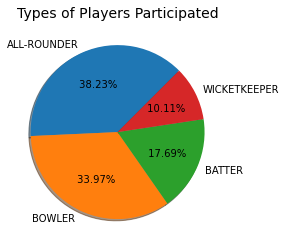

In [52]:
# plot a pie chart for different types of players
plt.pie(types, labels = types.index, autopct =' %1.2f%%', shadow = True, startangle=45)
plt.title('Types of Players Participated', fontsize = 14)
plt.plot()

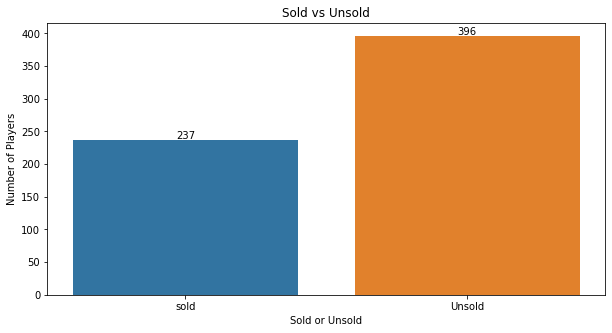

In [53]:
# Plot a bar graph for players sold or unsold
plt.figure(figsize=(10,5))
fig = sns.countplot(x='Status',data=ipl_data)
plt.ylabel('Number of Players')
plt.xlabel('Sold or Unsold')
plt.title('Sold vs Unsold')
plt.plot()
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2, p.get_height()) , ha = 'center', va = 'center',
                 xytext = (0,4), textcoords = 'offset points')

In [54]:
ipl_data['Status'].value_counts()

Unsold    396
sold      237
Name: Status, dtype: int64

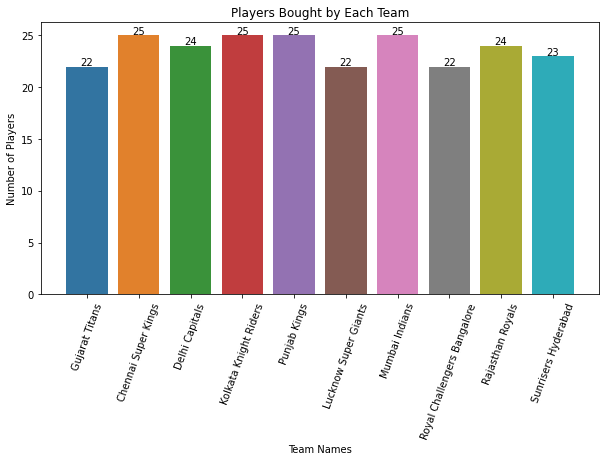

In [55]:
# Total players bought by each team
plt.figure(figsize=(10,5))
fig = sns.countplot(ipl_data[ipl_data['Team']!='Unsold']['Team'])
plt.ylabel('Number of Players')
plt.xlabel('Team Names')
plt.title('Players Bought by Each Team')
plt.xticks(rotation=70)
plt.plot()
for p in fig.patches:
    fig.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width()/2, p.get_height()) , ha = 'center', va = 'center',
                 xytext = (0,4), textcoords = 'offset points')

In [56]:
ipl_data['Retention'] = ipl_data['Base Price']
ipl_data['Retention'].replace(['2 Cr','40 Lakh', '20 Lakh', '1 Cr','75 Lakh','50 Lakh','30 Lakh','1.5 Cr'], 'From Auction', inplace=True)

In [61]:
# Treat Base Price
ipl_data['Base Price'].replace('Draft Pick', 0, inplace = True)

In [62]:
ipl_data['Base_Price'] = ipl_data['Base Price'].apply(lambda x: str(x).split(' ')[0])
ipl_data['Base_Price_Unit'] = ipl_data['Base Price'].apply(lambda x: str(x).split(' ')[-1])

In [63]:
ipl_data['Base_Price'].replace('Retained',0,inplace= True )

In [65]:
ipl_data.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price,Base_Price_Unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [67]:
# Total Players bought or retained by each team
ipl_data.groupby(['Team','Retention'])['Retention'].count()[:-1]

Team                         Retention   
Chennai Super Kings          From Auction    21
                             Retained         4
Delhi Capitals               From Auction    20
                             Retained         4
Gujarat Titans               Draft Pick       3
                             From Auction    19
Kolkata Knight Riders        From Auction    21
                             Retained         4
Lucknow Super Giants         Draft Pick       3
                             From Auction    19
Mumbai Indians               From Auction    21
                             Retained         4
Punjab Kings                 From Auction    23
                             Retained         2
Rajasthan Royals             From Auction    21
                             Retained         3
Royal Challengers Bangalore  From Auction    19
                             Retained         3
Sunrisers Hyderabad          From Auction    20
                             Retained         

[]

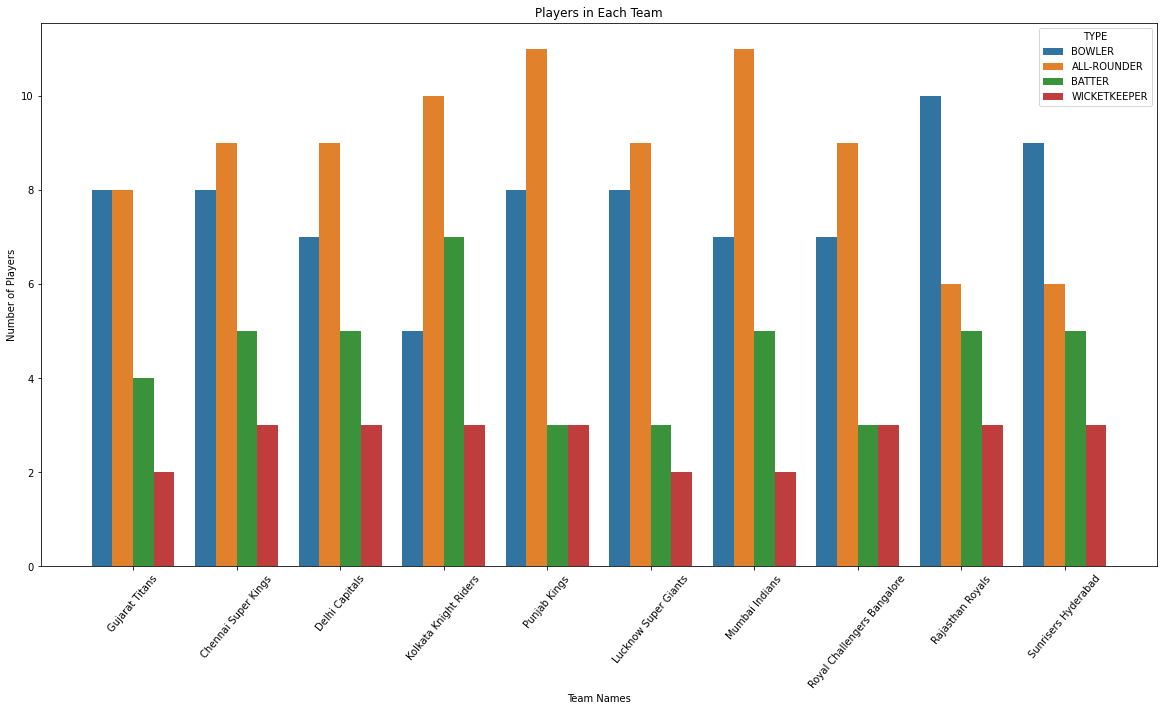

In [68]:
plt.figure(figsize=(20,10))
fig = sns.countplot(ipl_data[ipl_data['Team']!='Unsold']['Team'],hue=ipl_data['TYPE'])
plt.ylabel('Number of Players')
plt.xlabel('Team Names')
plt.title('Players in Each Team')
plt.xticks(rotation=50)
plt.plot()

In [69]:
#Highest amount spent on each player by each team in auction
ipl_data[ipl_data['Retention']=='From Auction'].groupby(['Team'])['COST IN ₹ (CR.)'].max()[:-1].sort_values(ascending=False)

Team
Mumbai Indians                 15.25
Chennai Super Kings            14.00
Kolkata Knight Riders          12.25
Punjab Kings                   11.50
Delhi Capitals                 10.75
Royal Challengers Bangalore    10.75
Sunrisers Hyderabad            10.75
Gujarat Titans                 10.00
Lucknow Super Giants           10.00
Rajasthan Royals               10.00
Name: COST IN ₹ (CR.), dtype: float64

In [71]:
# Name of player sold at maximum price
ipl_data[ipl_data['Retention']=='Retained'].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(1)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price,Base_Price_Unit
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.0,2080.0,CSK,Chennai Super Kings,sold,Retained,0,Retained


In [75]:
# Top 5 bowlers bought in auctionipl_data
ipl_data[(ipl_data['Retention']=='From Auction') & (ipl_data['TYPE']=='BOWLER')].sort_values(by = 'COST IN ₹ (CR.)', ascending = False).head(5)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,Status,Retention,Base_Price,Base_Price_Unit
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,2,Cr
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,2,Cr
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,1,Cr
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,20,Lakh


In [76]:
ipl_data = ipl_data.rename(columns={'2021 Squad': 'Prev Team'})

In [78]:
ipl_data

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),Prev Team,Team,Status,Retention,Base_Price,Base_Price_Unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0
...,...,...,...,...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,not participated,Unsold,Unsold,From Auction,20,Lakh
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold,From Auction,20,Lakh
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold,From Auction,20,Lakh
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,not participated,Unsold,Unsold,From Auction,20,Lakh


In [83]:
ipl_data[(ipl_data['Prev Team'] != 'not participated') & (ipl_data.Team == 'Unsold')][['Player', 'Prev Team']]

,Player,Prev Team
237,Suresh Raina,CSK
238,Steve Smith,DC
239,Shakib Al Hasan,KKR
240,Amit Mishra,DC
241,Adil Rashid,PBKS
242,Imran Tahir,CSK
243,Mujeeb Zadran,SRH
244,Adam Zampa,RCB
245,Rajat Patidar,RCB
246,Mohammed Azharuddeen,RCB
